# A Table based Q-Learning Reinforcement Agent in A Grid World

This is a simple example of a Q-Learning agent. The Q function is a table, and each decision is made by sampling the Q-values for a particular state thermally.

taken from here: https://notebook.community/kinshuk4/MoocX/misc/deep_learning_notes/Ch5_Deep_Reinforcement_Learning/Simple%20Q-Learning%20Frozen%20Lake%20(grid%20world)

In [1]:
import numpy as np
import random
import gym

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

from IPython.display import clear_output
from tqdm import tqdm

/home/marcel/.local/lib/python3.6/site-packages/gym/core.py:27: UserWarning: WARN: Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+
  "Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+"


In [2]:
env = gym.make('FrozenLake-v1')

In [3]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

success rate: 61.5%


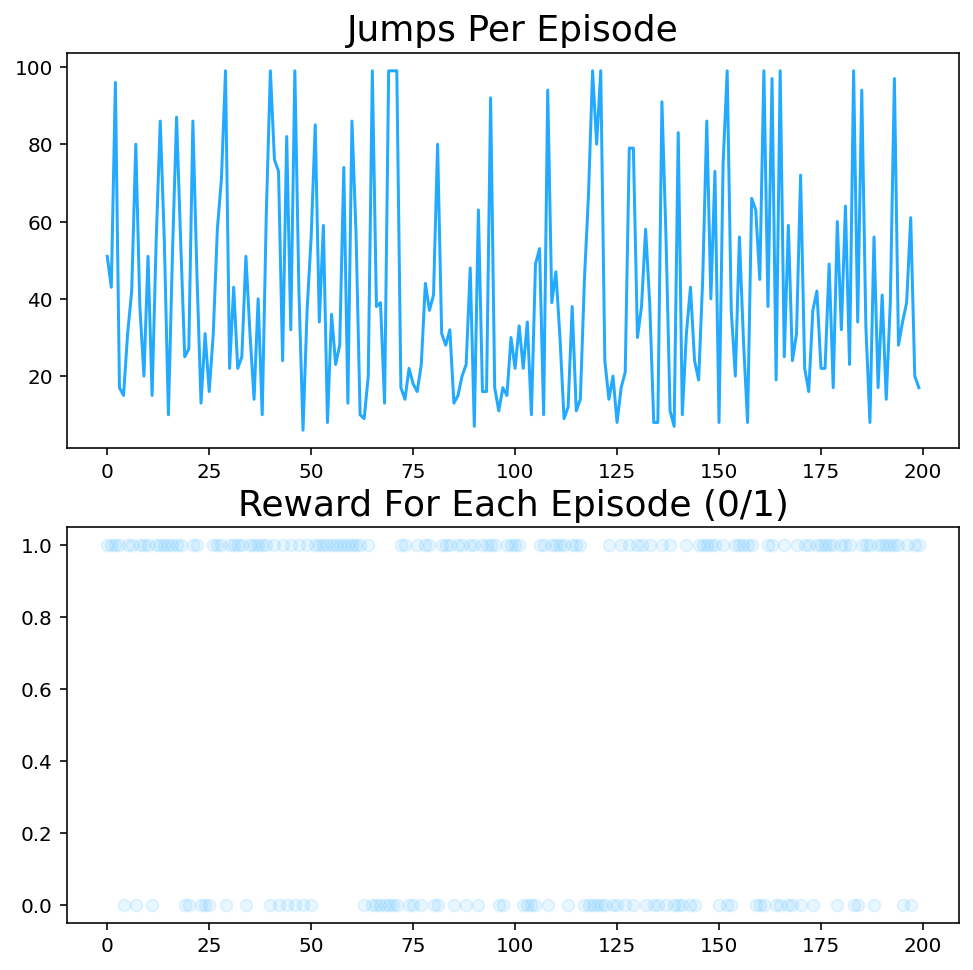

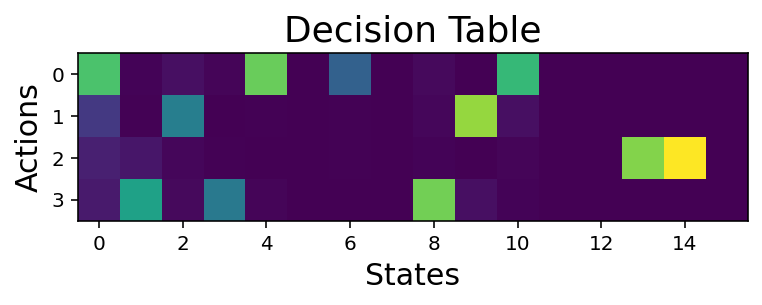

100%|█████████████████████████████████████████████████████████████████████████████████| 900/900 [00:01<00:00, 740.39it/s]


In [4]:
# Set learning parameters
decision_temperature = 0.01
l_rate = 0.5
y = .99
e = 0.1
num_episodes = 900

# create lists to contain total rewawrds and steps per episode

epi_length = []
rs = []

for i in tqdm(range(num_episodes)):
    s = env.reset()[0]
    r_total = 0
    done = False
    number_jumps = 0

    # limit numerb of jumps
    while number_jumps < 99:
        number_jumps += 1

        softmax = np.exp(Q[s]/decision_temperature)
        rand_n = np.random.rand() * np.sum(softmax)
        
        # pick the next action randomly
        acc = 0
        for ind in range(env.action_space.n):
            acc += softmax[ind]
            if acc >= rand_n:
                a = ind
                break
                
        s_next, r, done, _ , _= env.step(a)


        Q_next_value = Q[s_next]


        max_Q_next = np.max(Q[s_next,:])

        # now update Q
        Q[s, a] += l_rate * (r + y * max_Q_next - Q[s, a])

        r_total += r
        s = s_next
        if done:
            # be more conservative as we learn more
            e = 1./((i/50) + 10)
            break

    if i%900 == 899:

        clear_output(wait=True)
        print("success rate: " + str(sum(rs[-200:])/2) + "%")

        plt.figure(figsize=(8, 8))
        plt.subplot(211)
        plt.title("Jumps Per Episode", fontsize=18)
        plt.plot(epi_length[-200:], "#23aaff")
        plt.subplot(212)
        plt.title('Reward For Each Episode (0/1)', fontsize=18)
        plt.plot(rs[-200:], "o", color='#23aaff', alpha=0.1)
        
        plt.figure(figsize=(6, 6))
        plt.title('Decision Table', fontsize=18)
        plt.xlabel("States", fontsize=15)
        plt.ylabel('Actions', fontsize=15)
        plt.imshow(Q.T)
        plt.show()

    epi_length.append(number_jumps)
    rs.append(r_total)

In [5]:
def mv_avg(xs, n):
    return [sum(xs[i:i+n])/n for i in range(len(xs)-n)]
# plt.plot(mv_avg(rs, 200))

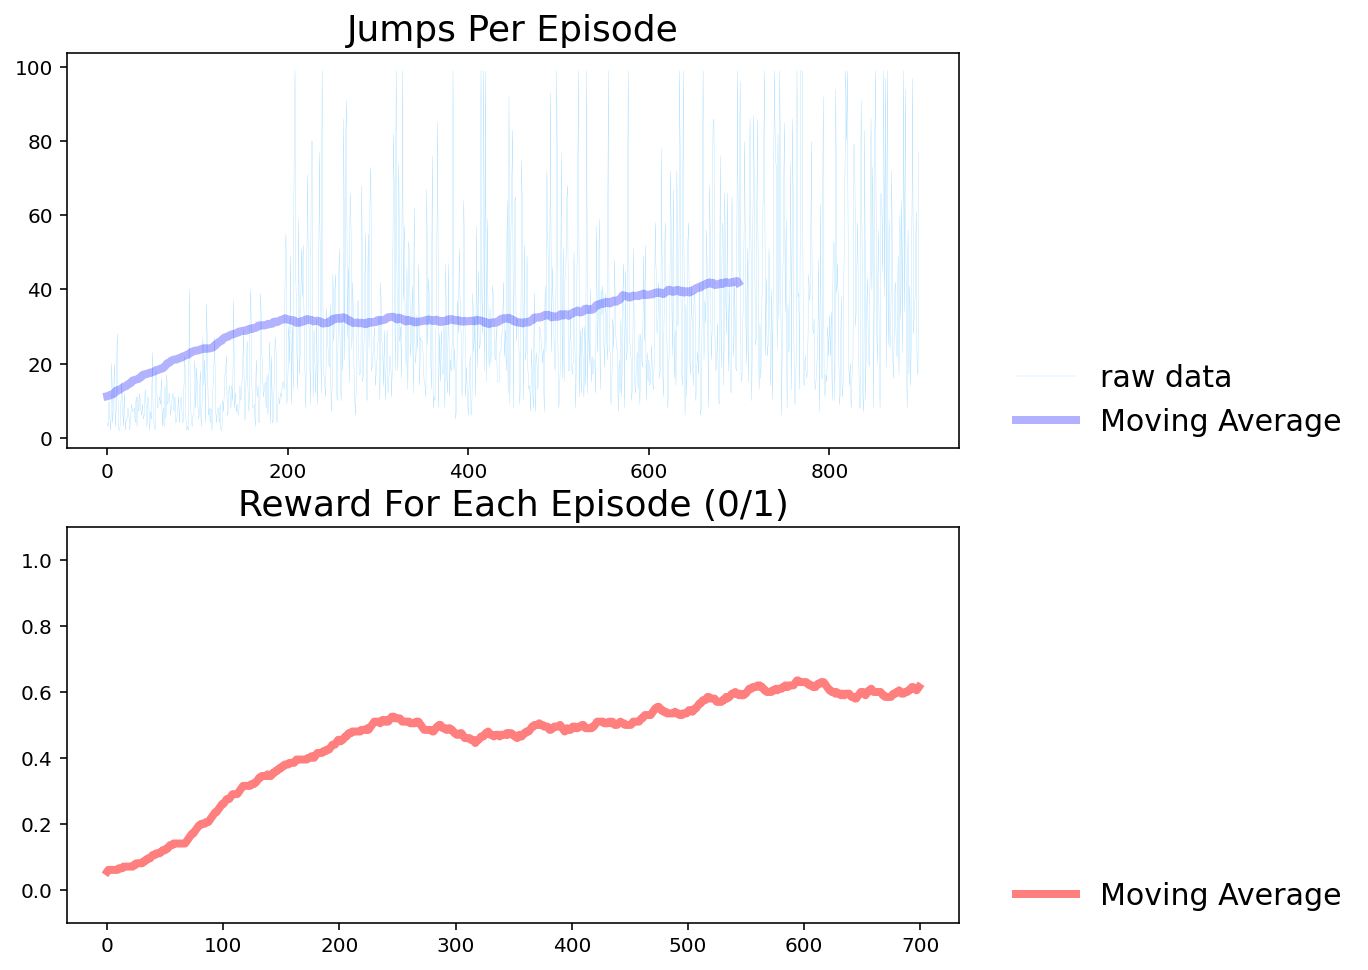

In [6]:
plt.figure(figsize=(8, 8))
plt.subplot(211)
plt.title("Jumps Per Episode", fontsize=18)
plt.plot(epi_length, "#23aaff", linewidth=0.1, alpha=0.7,
        label="raw data")
plt.plot(mv_avg(epi_length, 200), color="blue", alpha=0.3, linewidth=4, 
         label="Moving Average")
plt.legend(loc=(1.05, 0), frameon=False, fontsize=15)
plt.subplot(212)
plt.title('Reward For Each Episode (0/1)', fontsize=18)
#plt.plot(rs, "o", color='#23aaff', alpha=0.2, markersize=0.4, label="Reward")
plt.plot(mv_avg(rs, 200), color="red", alpha=0.5, linewidth=4, label="Moving Average")
plt.ylim(-0.1, 1.1)
plt.legend(loc=(1.05, 0), frameon=False, fontsize=15)
